In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from preprocessing import Preprocessor
from scipy import interpolate
from network import RNN

In [2]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df, X_feat = pp.preprocess()
X_feat

['hydro',
 'micro',
 'thermal',
 'wind',
 'river',
 'total',
 'sys_reg',
 'flow',
 'struct_imb',
 'min_day_sin',
 'min_day_sin',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'y_24h',
 'y_prev']

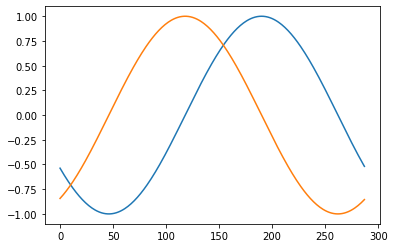

In [3]:

time_of_day_sin = train_df[["min_day_sin"]].to_numpy()
time_of_day_cos = train_df[["min_day_cos"]].to_numpy()
time_steps_day = 1440//5
plt.plot(time_of_day_sin[:time_steps_day])
plt.plot(time_of_day_cos[:time_steps_day])
plt.show()

In [4]:
# day_week_sin = train_df[["day_week_sin"]].to_numpy()
# day_week_cos = train_df[["day_week_sin"]].to_numpy()
# time_steps_day = (60 * 24 * 7)//5
# plt.plot(day_week_sin[:time_steps_day])
# plt.plot(day_week_cos[:time_steps_day])
# plt.show()

In [5]:
val_df.columns

Index(['start_time', 'hydro', 'micro', 'thermal', 'wind', 'river', 'total',
       'y', 'sys_reg', 'flow', 'load', 'struct_imb', 'y_with_struct_imb',
       'min_day_sin', 'min_day_cos', 'day_0', 'day_1', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'y_24h', 'y_prev'],
      dtype='object')

In [6]:
date_time = pd.to_datetime(train_df["start_time"])
t = train_df[:200]
a = t[date_time.dt.minute == 30]["total"]
a.index
t["total"].index

/var/folders/zr/_vkv5pc53m5cdqgxd4n6qhfr0000gn/T/ipykernel_16746/938045449.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = t[date_time.dt.minute == 30]["total"]


Int64Index([288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
            ...
            478, 479, 480, 481, 482, 483, 484, 485, 486, 487],
           dtype='int64', length=200)

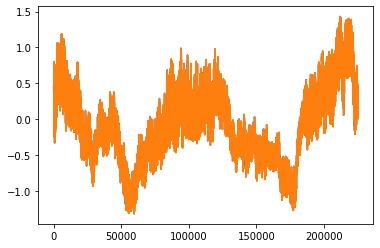

In [7]:
pp2 = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df, X_feat = pp2.preprocess()
# num_steps = 250
# df = pp2.train_df[:num_steps].copy()
df = pp2.train_df.copy()



df["load"] = df["total"] + df["flow"]
x_load = df["load"].index

date_time = pd.to_datetime(df["start_time"])

load_midpoints_y_df = df[date_time.dt.minute == 30]["load"]
load_midpoints_x = load_midpoints_y_df.index
load_midpoints_y = df[date_time.dt.minute == 30]["load"].to_numpy()

tck = interpolate.splrep(load_midpoints_x, load_midpoints_y)
y_interp = interpolate.splev(x_load, tck)

plt.plot(x_load, df["load"])
plt.plot(x_load, y_interp)
plt.show()

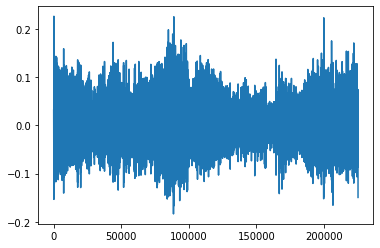

In [8]:
df["struct_imb"] = df["load"] - y_interp
plt.plot(df["struct_imb"])


<AxesSubplot:>

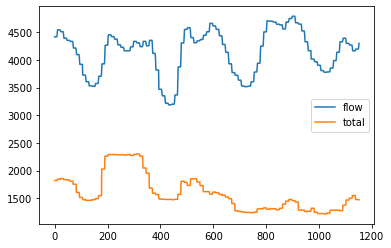

In [9]:
pp3 = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
df = pp3.train_df
df[["flow", "total"]].iloc[: 12 * 24 * 4].plot()


<AxesSubplot:>

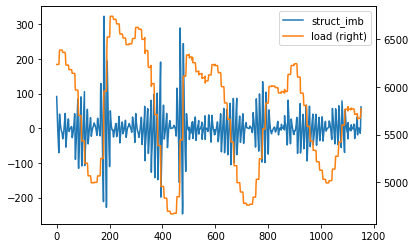

In [10]:
df["load"] = df["total"] + df["flow"]
x_total = df["load"].index

date_time = pd.to_datetime(df["start_time"])
y_points_df = df[date_time.dt.minute == 30]["load"]
x_points = y_points_df.index
y_points = df[date_time.dt.minute == 30]["load"].to_numpy()

tck = interpolate.splrep(x_points, y_points)
y_interp = interpolate.splev(x_total, tck)

df["struct_imb"] = df["load"] - y_interp

df[["struct_imb", "load"]].iloc[: 12 * 24 * 4].plot(secondary_y=["load"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

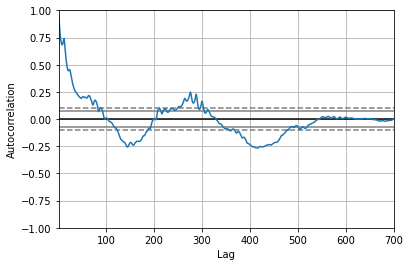

In [11]:
pd.plotting.autocorrelation_plot(df["y"].iloc[0:700])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

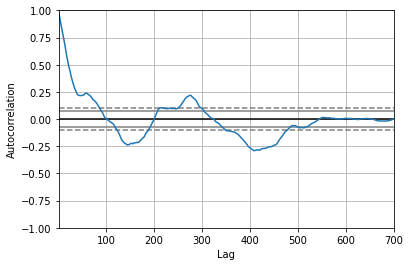

In [12]:
data = df["y"] - df["struct_imb"]
pd.plotting.autocorrelation_plot(data.iloc[0:700])

<AxesSubplot:>

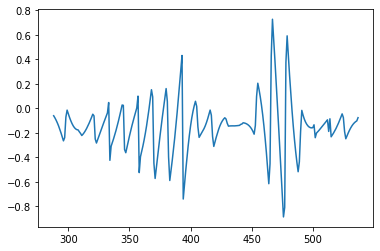

In [17]:
pp4 = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv", alt_forcasting=True)
train_df, val_df, X_feat = pp4.preprocess()
train_df["struct_imb"][:250].plot()

<AxesSubplot:>

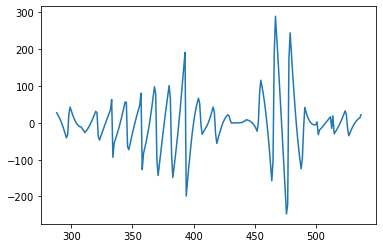

In [18]:
df["struct_imb"][288:288+250].plot()

In [21]:
pp4 = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv", alt_forcasting=True)
train_df, val_df, X_feat = pp4.preprocess()

df = train_df.copy()
df["load"] = df["total"] + df["flow"]
x_load = df["load"].index

date_time = pd.to_datetime(df["start_time"])

load_midpoints_y_df = df[date_time.dt.minute == 30]["load"]
load_midpoints_x = load_midpoints_y_df.index
load_midpoints_y = df[date_time.dt.minute == 30]["load"].to_numpy()

tck = interpolate.splrep(load_midpoints_x, load_midpoints_y)
y_interp = interpolate.splev(x_load, tck)

df["struct_imb"] = df["load"] - y_interp

df["y_with_struct_imb"] = df["y"]

# Removing structural imbalance from y, if altered forecasting
if True:
    df["y"] = df["y"] - df["struct_imb"]

df[["y", "y_with_struct_imb", "struct_imb"]]

,y,y_with_struct_imb,struct_imb
288,-0.131306,-0.100725,3.058128e-02
289,-0.123350,-0.101253,2.209621e-02
290,-0.113252,-0.099071,1.418146e-02
291,-0.121398,-0.114577,6.821291e-03
292,-0.117436,-0.117436,-1.110223e-16
...,...,...,...
225083,-0.184278,-0.239264,-5.498637e-02
225084,-0.153232,-0.228919,-7.568652e-02
225085,-0.135423,-0.233735,-9.831196e-02
225086,-0.080774,-0.203715,-1.229409e-01
